# Univariate Statistics

## Estimators of the main statistical measures
### Mean
$$\bar{x} = \frac{1}{n}\sum_i x_i$$
### Variance
$$\sigma_x^2 = \frac{1}{n-(df)}\sum_i(\bar{x}-x_i)^2$$
### Standard deviation
$$\sigma_x = \sqrt{\sigma_x^2}$$
### Covariance
$$\sigma_{xy} = \frac{1}{n-1}\sum_i (\bar{x} - x_i)(\bar{y} - y_i)$$
### Correlation
$$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
### Standard error (SE)
Standard deviation (of the sampling distribution) of a statistic (for mean, a special case):
$$SE(\bar{x}) = \frac{\sigma_x}{\sqrt{n}}$$

## Main distributions
### Normal distribution
$$\mathcal{N}(\mu, \sigma)$$
### The Chi-Square distribution
If there are $n$ normally distributed distributions $\mathcal{N}(0, 1)$ then the sum of squares follows $\chi^2_n$ distribution.
### The Fisher's F-distribution
A ratio of two independent $\chi^2$ variables. If $X\sim\chi_n^2$ and $Y\sim\chi_m^2$, then
$$F_{n,m} = \frac{X/n}{Y/m}$$

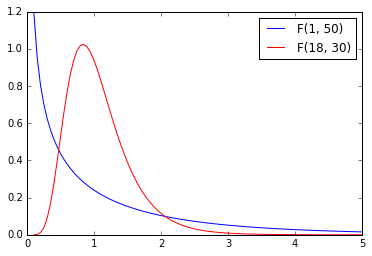

In [110]:
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy.stats import f
import matplotlib.pyplot as plt

fvalues = np.linspace(.1, 5, 100)

#f.pdf([], dfn, dfd) where dfn and dfd are shape parameters

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 50), 'b-', label="F(1, 50)")
plt.plot(fvalues, f.pdf(fvalues, 18, 30), 'r-', label="F(18, 30)")
plt.legend()
plt.show()

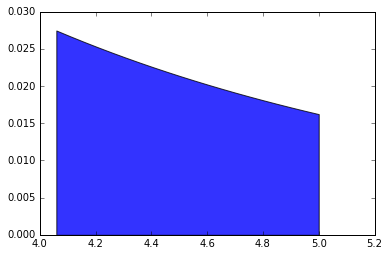

In [111]:
# cdf(x, df1, df2): Cumulative distribution function of F.
# ie.
proba_at_f_inf_3 = f.cdf(3, 1, 50) # P(F(1,50) < 3)

# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 50) # q such P(F(1,50) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 50) == .95

# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 50) # P(F(1,50) > 3)
assert proba_at_f_inf_3 + proba_at_f_sup_3 == 1

# p-value: P(F(1, 50)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30), alpha=.8, label="P < 0.05")
plt.show()

### The Student's t-distribution
If $M\sim\mathcal{N}(0,1)$ and $V\sim\chi^2_n$, then t-distribution with n d.o.f. is:
    $$T_n = \frac{M}{\sqrt{V/n}}$$

## Testing pairwise associations
1. Categorical variable: for e.g. sex, hair color (no intrinsic ordering)
2. Ordinary variable: for e.g. drinks per day(intrinsic ordering)
3. Quantitative variable: for e.g. salary, weight
### Pearson correlation test (quantitative~quantitative)

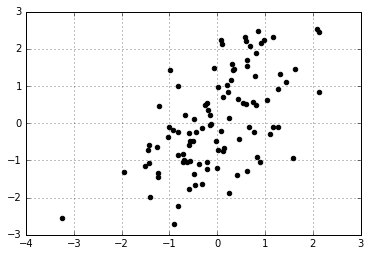

Pearson’s correlation coefficient: 0.588068512314392
2-tailed p-value                 : 1.2500925349371828e-10


In [112]:
import scipy.stats as stats

n = 100
x = np.random.normal(size = n)
y = .75 * x + np.random.normal(size = n)

cor, pval = stats.pearsonr(x,y)
plt.scatter(x,y, c = 'black')
plt.grid()
plt.show()

print('Pearson’s correlation coefficient:', cor)
print('2-tailed p-value                 :', pval)

### One sample t-test (quantitative~constant)
1. Model the data

Assume $X \sim\mathcal {N}(\mu,\sigma)$ 
2. Fit: estimate the model parameters

estimators: $\bar{x}, \sigma_x$
3. Test

use the statistic: 
$$t = \frac{\bar{x}-\mu_0}{\sigma_x/\sqrt{n}}$$


In [113]:
np.random.seed(42)

x = np.random.normal(1.77, .1, 90)

tval, pval = stats.ttest_1samp(x, 1.75) 

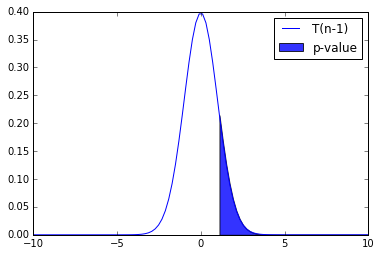

In [114]:
tvalues = np.linspace(-10, 10, 100)

plt.plot(tvalues, stats.t.pdf(tvalues, n-1), label = "T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tval]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value")
plt.legend()
plt.show()

### Two sample t-test (quantitative~categorical)
1. Model the data

Assume $x\sim\mathcal{N}(\mu_x,\sigma_x),y\sim\mathcal{N}(\mu_y,\sigma_y)$
2. Fit: estimate the model parameters

Estimate $\bar{x}, \sigma_x, \bar{y}, \sigma_y$

3. t-Test

$$t = \frac{\text{effect size}}{\sqrt{\text{unexplained variance}}}$$
#### Equal or unequal sample sizes, equal variance
$$t = \frac{\bar x\bar y}{\sigma.\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma^2(n_x-1)+\sigma^2(n_y-1)}{n_x+n_y+2}}$$


#### Equal or unequal sample sizes, unequal variance (Welch's t-test)

Welch-Satterthwaitre:

$$\nu \approx \frac{\left(\frac{\sigma_x^2}{n_x}+\frac{\sigma_y^2}{n_y}\right)^2}{\frac{\sigma_x^4}{n_x^2(n_x-1)}+\frac{\sigma_x^4}{n_x^2(n_x-1)}}$$



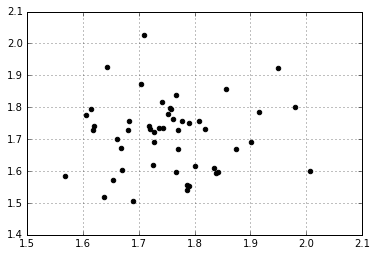

In [115]:
x = np.random.normal(1.76, 0.1, 50)
y = np.random.normal(1.70, 0.12, 50)

cor, pval = stats.ttest_ind(x, y, equal_var = True)

plt.scatter(x,y, c = 'black')
plt.grid()
plt.show()

### ANOVA F-test (quantitative~categorical)
1. Model the data

Assume $Y_i = \mathcal{N}(\mu_i, \sigma_i)$
2. Fit: estimate the model parameters

Estimate $\bar{y_i}, \sigma_i$

3. F-Test

$$F = \frac{\sum_i n_i(\bar{Y_i}-\bar{Y})^2/(K-1)}{\sum_{ij} (Y_{ij}-\bar{Y_i})^2/(N-K)} $$


In [116]:
mu_k = np.array([1,  2,  3])
sd_k = np.array([1,  1,  1])
n_k  = np.array([10, 20, 30]) 

grp = [0, 1, 2]
n = np.sum(n_k)
label = np.hstack([[k] * n_k[k] for k in [0, 1, 2]])

y = np.zeros(n)
for k in grp:
    y[label == k] = np.random.normal(mu_k[k], sd_k[k], n_k[k])

fval, pval = stats.f_oneway(y[label == 0], y[label == 1], y[label == 2])

print('F-value:', fval)
print('P-value:', pval)

F-value: 16.45941744005791
P-value: 2.278711089237564e-06


### Chi-Square (categorical~categorical)

In [117]:
import pandas as pd

canalar_tumor = np.array([1] * 10 + [0] * 5) #[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
meta = np.array([1] * 8 + [0] * 6 + [1])     #[1 1 1 1 1 1 1 1 0 0 0 0 0 0 1]

crosstab = pd.crosstab(canalar_tumor, meta, rownames=['canalar_tumor'], colnames=['meta'])
print("Observed table:")
print("---------------")
print(crosstab)
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = {}, pval = {}".format(chi2, pval))
print("Expected table:")

Observed table:
---------------
meta           0  1
canalar_tumor      
0              4  1
1              2  8
Statistics:
-----------
Chi2 = 2.8125, pval = 0.09353251268909288
Expected table:


In [118]:
meta_marg = crosstab.sum(axis=0)
meta_freq = meta_marg / meta_marg.sum()

canalar_tumor_marg = crosstab.sum(axis=1)
canalar_tumor_freq = canalar_tumor_marg / canalar_tumor_marg.sum()

print('Canalar tumor frequency? Yes: {:2f}'.format(canalar_tumor_freq[0]), 'No:{:2f}'.format(canalar_tumor_freq[1]))
print('Metastasis frequency? Yes: {:.2f}'.format(meta_freq[0]), 'No: {:.2f}'.format(meta_freq[1]))
print('---------------------------')

print('Expected frequencies:')
print(np.outer(canalar_tumor_freq, meta_freq))
print('---------------------------')

print('Expected cross-table (frequencies * N): ')
print(np.outer(canalar_tumor_freq, meta_freq) * len(canalar_tumor))

Canalar tumor frequency? Yes: 0.333333 No:0.666667
Metastasis frequency? Yes: 0.40 No: 0.60
---------------------------
Expected frequencies:
[[0.13333333 0.2       ]
 [0.26666667 0.4       ]]
---------------------------
Expected cross-table (frequencies * N): 
[[2. 3.]
 [4. 6.]]


## Non-parametric test of pairwise associations
### Spearman rank-order correlation (quantitative~quantitative)

In [119]:
np.random.seed(seed=42)

n         = 50
noutliers = 10

x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

y[:noutliers] = np.random.normal(-10, size=noutliers)
outlier = np.array(["N"] * n)
outlier[:noutliers] = "Y"

cor, pval = stats.spearmanr(x, y)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))

cor, pval = stats.pearsonr(x, y)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

Non-Parametric Spearman cor test, cor: 0.2996, pval: 0.0345
Parametric Pearson cor test: cor: 0.0426, pval: 0.7687


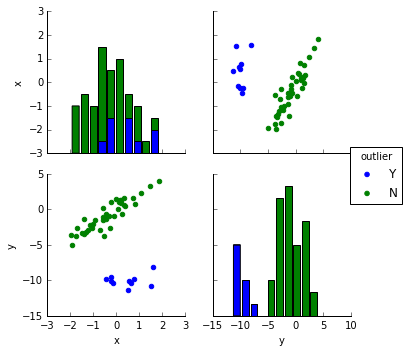

In [120]:
df = pd.DataFrame(dict(x=x, y=y, outlier=outlier))

g = sns.PairGrid(df, hue="outlier")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g = g.add_legend()

### Wilcoxon signed-rank test (quantitative~cte)

In [121]:
bv0     = np.random.normal(3,.1, 20)
bv1     = bv0 + 0.1 + np.random.normal(0,.1, 20)
bv1[0] -= 10

print(stats.ttest_rel(bv0, bv1))
print(stats.wilcoxon(bv0, bv1))

Ttest_relResult(statistic=0.8229024673804454, pvalue=0.42077212061718194)
WilcoxonResult(statistic=43.0, pvalue=0.020633435105949553)


### Maan-Whitney U test (quantitative~categorical)

In [122]:
bv0     = np.random.normal(1,.1, 20)
bv1     = np.random.normal(1.2, .1, 20)
bv1[0] -= 10

print(stats.ttest_ind(bv0, bv1))
print(stats.mannwhitneyu(bv0, bv1))

Ttest_indResult(statistic=0.6274852038400416, pvalue=0.5340938873446284)
MannwhitneyuResult(statistic=43.0, pvalue=2.3024709881112628e-05)


## Linear Model
$$y_i = \beta_0+\beta_1x_i^1+\dots+\beta_px_i^p+\epsilon_i, ~~~~i = 1, \dots, n $$
1. Independent variable ($\textbf{Predictors}$)
2. Dependent variable ($\textbf{Target Variables}$)

### Simple linear regression
1. Model the data
$$\text{salary}_i = \beta~\text{experience}_i+\beta_0+\epsilon$$
$$y_i = \beta x_i+\beta_0+\epsilon$$

 - $\beta$ is slope or $\textbf{parameter}$ of the model
 - $\beta$ is intercept or $\textbf{bias}$ of the model
 - $\epsilon$ is $i$th error or $\textbf{residual}$ with $\epsilon \sim \mathcal{N}(0,\sigma^2)$

2. Fit: estimate the model parameters
minimize $SSE=\sum_i\epsilon^2_i$

$$SSE = \sum_i(y_i - \beta x_i - \beta_0)^2$$

$$\beta_0 = \bar{y} - \beta \bar{x}$$

$$ \beta = \frac{Cov(x,y)}{Var(x)}\frac{\frac{1}{n}\sum_i x_iy_i - \bar x \bar y}{\frac{1}{n}\sum_i(\bar x - x_i)} $$

y = 491.48691316992097 x + 13584.043803399505, 
r        : 0.5388858753119479, 
r-squared: 0.29039798661072425
p-value  : 0.00011165738829307944, 
std_err  : 115.82338123581142


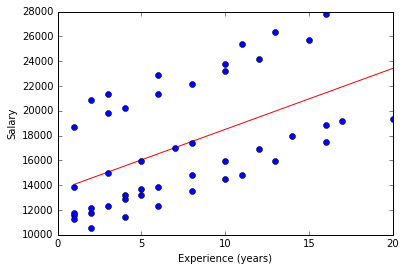

In [123]:
url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/salary_table.csv'
salary = pd.read_csv(url)

y, x = salary.salary, salary.experience
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)


print("y = {} x + {}, \nr        : {}, \nr-squared: {}".format(beta, beta0, r_value, r_value**2))
print("p-value  : {}, \nstd_err  : {}".format(p_value, std_err))

yhat = beta * x + beta0 
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

3. F-Test
#### Goodness of fit
$$R^2 = \frac{SS_{reg}}{SS_{tot}} = 1 - \frac{SS_{res}}{SS_{tot}}$$

#### Test
### Multiple regression
#### Theory
#### Fit with Numpy

In [124]:
import scipy 

np.random.seed(seed=42)

N, P = 50, 4
X = np.random.normal(size= N * P).reshape((N, P))

X[:, 0] = 1
print(X[:5, :])

betastar = np.array([10, 1., .5, 0.1])
e        = np.random.normal(size=N)
y        = np.dot(X, betastar) + e

Xpinv = scipy.linalg.pinv2(X)
betahat = np.dot(Xpinv, y)
print("Estimated beta:\n", betahat)

[[ 1.         -0.1382643   0.64768854  1.52302986]
 [ 1.         -0.23413696  1.57921282  0.76743473]
 [ 1.          0.54256004 -0.46341769 -0.46572975]
 [ 1.         -1.91328024 -1.72491783 -0.56228753]
 [ 1.          0.31424733 -0.90802408 -1.4123037 ]]
Estimated beta:
 [10.14742501  0.57938106  0.51654653  0.17862194]


## Linear models with stats models
### Multiple regression
#### Interface with Numpy
#### interface with Pandas
### Multiple regression with categorical independent variables or factors: Analysis  of covariance (ANCOVA)
#### One-way AN(C)OVA
#### Two-way AN(C)OVA
#### Comparing two nested models
#### Factor coding

## Multiple comparisons
### Bonferroni correction for multiple comparisons
### The False Discovery Rate (FDR) for multiple comparisons

## Excercise